<a href="https://colab.research.google.com/github/alpha529/machine-learning/blob/main/PCA_and_T_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOADING MNIST DATA SET
https://www.kaggle.com/c/digit-recognizer/data

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


   
d0 = pd.read_csv('train.csv')

print(d0.head(5)) # print first five rows of d0.

# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)

   label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...       0.0       0.0       0.0       0.0
1      0       0       0       0  ...       0.0       0.0       0.0       0.0
2      1       0       0       0  ...       0.0       0.0       0.0       0.0
3      4       0       0       0  ...       0.0       0.0       0.0       0.0
4      0       0       0       0  ...       0.0       0.0       0.0       0.0

[5 rows x 785 columns]


In [ ]:
print(d.shape)
print(l.shape)

(16061, 784)
(16061,)


display or plot a number 

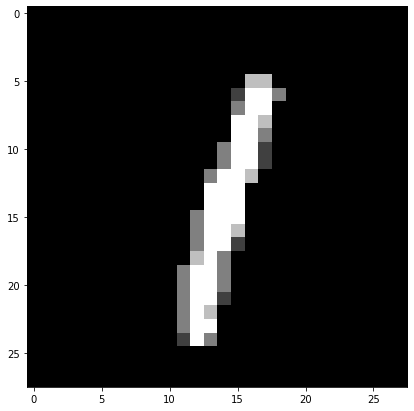

1


In [ ]:
plt.figure(figsize = (7,7))
idx = 1500
grid = d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid,interpolation='none' ,cmap='gray')
plt.show()
print(l[idx])

working with 15000 data points

In [ ]:
labels = l.head(15000)
data = d.head(15000)
print('the shape of the samples data is {}'.format(data.shape))

the shape of the samples data is (15000, 784)


standardisation of data

In [ ]:
from sklearn.preprocessing import StandardScaler
standardised_data = StandardScaler().fit_transform(data)
print(standardised_data.shape)

(15000, 784)


forming a co-variance matrix

In [ ]:
sample_data = standardised_data
covariance_matrix = np.matmul(sample_data.T,sample_data)
print(covariance_matrix.shape)

(784, 784)


eigen values and eigen vectors 

In [ ]:
from scipy.linalg import eigh
values,vectors = eigh(covariance_matrix,eigvals=(782,783))
vectors = vectors.T
print(vectors.shape)

(2, 784)


In [ ]:
import matplotlib.pyplot as plt
new_cordinates = np.matmul(vectors,sample_data.T)
print(new_cordinates.shape)

(2, 15000)


In [ ]:
import pandas as pd 
new_cordinates = np.vstack((new_cordinates, labels)).T
dataframe = pd.DataFrame(data=new_cordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

ValueError: ignored

PCA using scikit learn


(15000, 2)


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


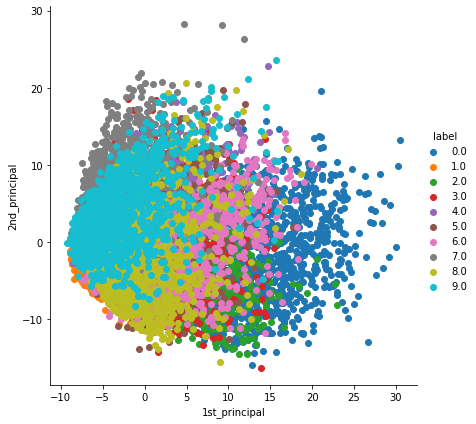

In [ ]:
import seaborn as sn
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
print(pca_data.shape)
pca_data = np.vstack((pca_data.T, labels)).T
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

PCA for dimensionality reduction(visulation)

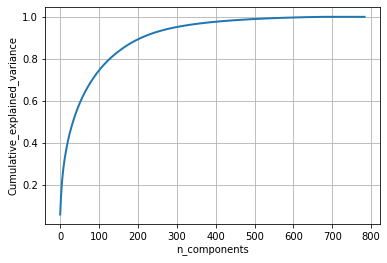

In [ ]:
pca.n_components = 784 
pca_data = pca.fit_transform(sample_data)
percentage_var_explained = pca.explained_variance_ /np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


T-SNE using scikit.learn

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


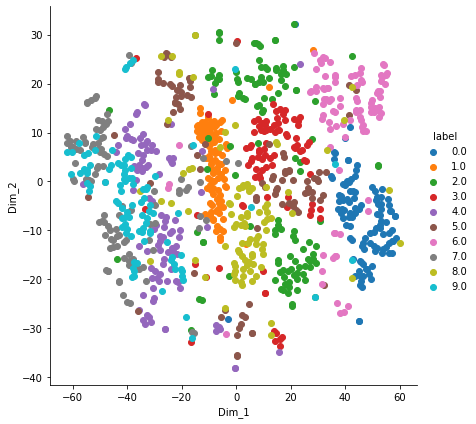

In [ ]:
from sklearn.manifold import TSNE
data_1000 = standardised_data[0:1000,:]
labels_1000 = labels[0:1000]
model = TSNE(n_components = 2,random_state = 0)
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


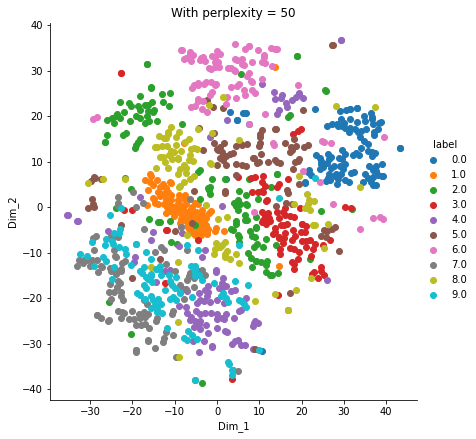

In [ ]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


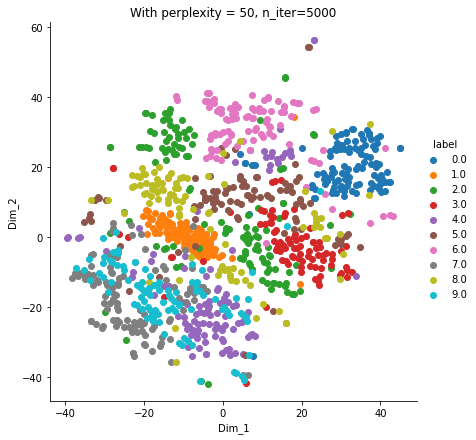

In [ ]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()